### In-sample convergence

In [1]:
SGR_TO_TEXT_AND_COLOR = {
    "basic": ["Basic", "#045275"],
    "moment20": ["Moment", "#089099"], 
    "filter10": ["Strata", "#7CCBA2"],
    "copula20": ["Copula-matching", "#FCDE9C"],
    "copula-filter10": ["Copula-strata", "#F0746E"], 
}

#### Multiple trials

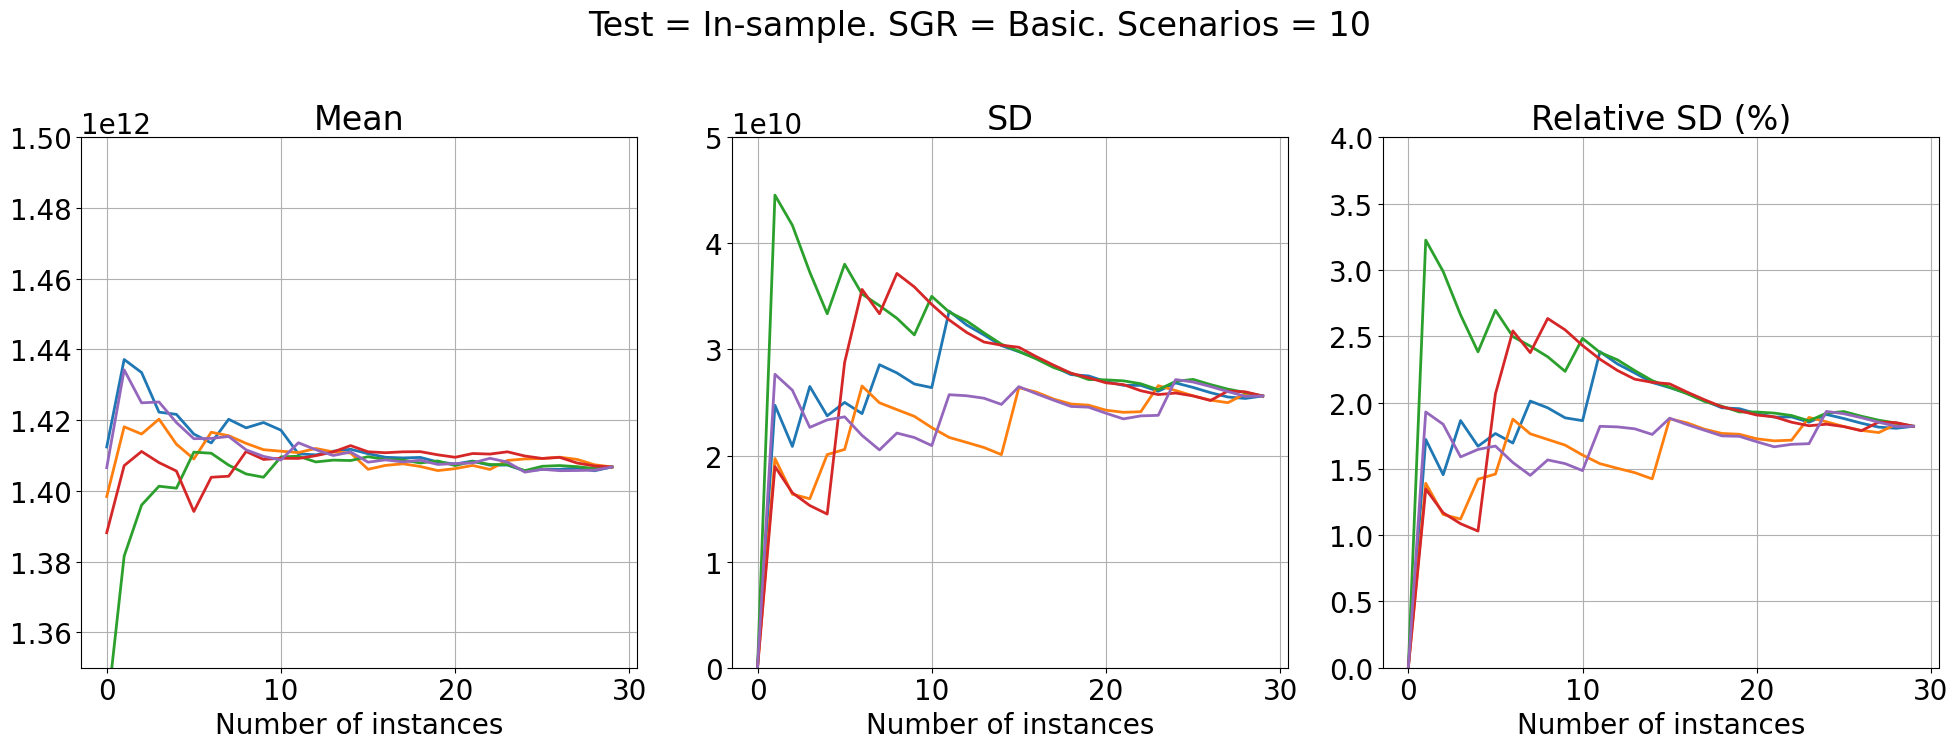

In [2]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ylims_mean = {10: [1.35e12, 1.5e12], 50: [1.35e12, 1.48e12], 100: [1.35e12, 1.48e12]}
ylims_std = {10: [0, 5e10], 50: [0, 4e10], 100: [0, 4e10]}
ylims_rel_std = {10: [0, 4], 50: [0, 2], 100: [0, 2]}

method = "basic"
num_scenarios = 10

base_folder = f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(num_scenarios)}"

num_trials = 5  # Number of trials
num_instances = 30

all_mean_values = []
all_std_values = []
all_rel_std_values = []

for _ in range(num_trials):
    values = [float(pd.read_csv(base_folder + "/" + str(i) + "/results_objective.csv").columns[0].split(":")[1]) for i in range(1, num_instances + 1)]

    random.shuffle(values)

    obj_values = []

    for i in range(0, num_instances):
        appending_values = []
        for j in range(0, i + 1):
            appending_values.append(values[j])
        obj_values.append(appending_values)

    mean_values = [np.mean(x) for x in obj_values]
    std_values = [np.std(x) for x in obj_values]
    rel_std_values = [std_values[i] / mean_values[i] * 100 for i in range(len(std_values))]

    all_mean_values.append(mean_values)
    all_std_values.append(std_values)
    all_rel_std_values.append(rel_std_values)

# Create subplots
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot mean for each trial
for idx, mean_values in enumerate(all_mean_values):
    axs[0].plot(range(num_instances), mean_values, label=f'Trial {idx+1}', lw=2)

axs[0].set_xlabel('Number of instances')
axs[0].set_title('Mean')
axs[0].set_ylim(ylims_mean[num_scenarios][0], ylims_mean[num_scenarios][1])
axs[0].grid(True)


# Plot standard deviation for each trial
for idx, std_values in enumerate(all_std_values):
    axs[1].plot(range(num_instances), std_values, label=f'Trial {idx+1}', lw=2)

axs[1].set_xlabel('Number of instances')
axs[1].set_title('SD')
axs[1].set_ylim(ylims_std[num_scenarios][0], ylims_std[num_scenarios][1])
axs[1].grid(True)


# Plot relative standard deviation for each trial
for idx, rel_std_values in enumerate(all_rel_std_values):
    axs[2].plot(range(num_instances), rel_std_values, label=f'Trial {idx+1}', lw=2)

axs[2].set_xlabel('Number of instances')
axs[2].set_title('Relative SD (%)')
axs[2].set_ylim(ylims_rel_std[num_scenarios][0], ylims_rel_std[num_scenarios][1])
axs[2].grid(True)

# Add supertitle
plt.tight_layout(rect=[0, 0.03, 1, 0.9])  # Adjust the layout to make space for the suptitle
fig.suptitle(f"Test = In-sample. SGR = {SGR_TO_TEXT_AND_COLOR[method][0]}. Scenarios = {num_scenarios}")

plt.savefig(f"ConvergencePlots/in-sample-{method}-{num_scenarios}", bbox_inches="tight")
plt.show()

### OOS convergence

#### Multiple trials

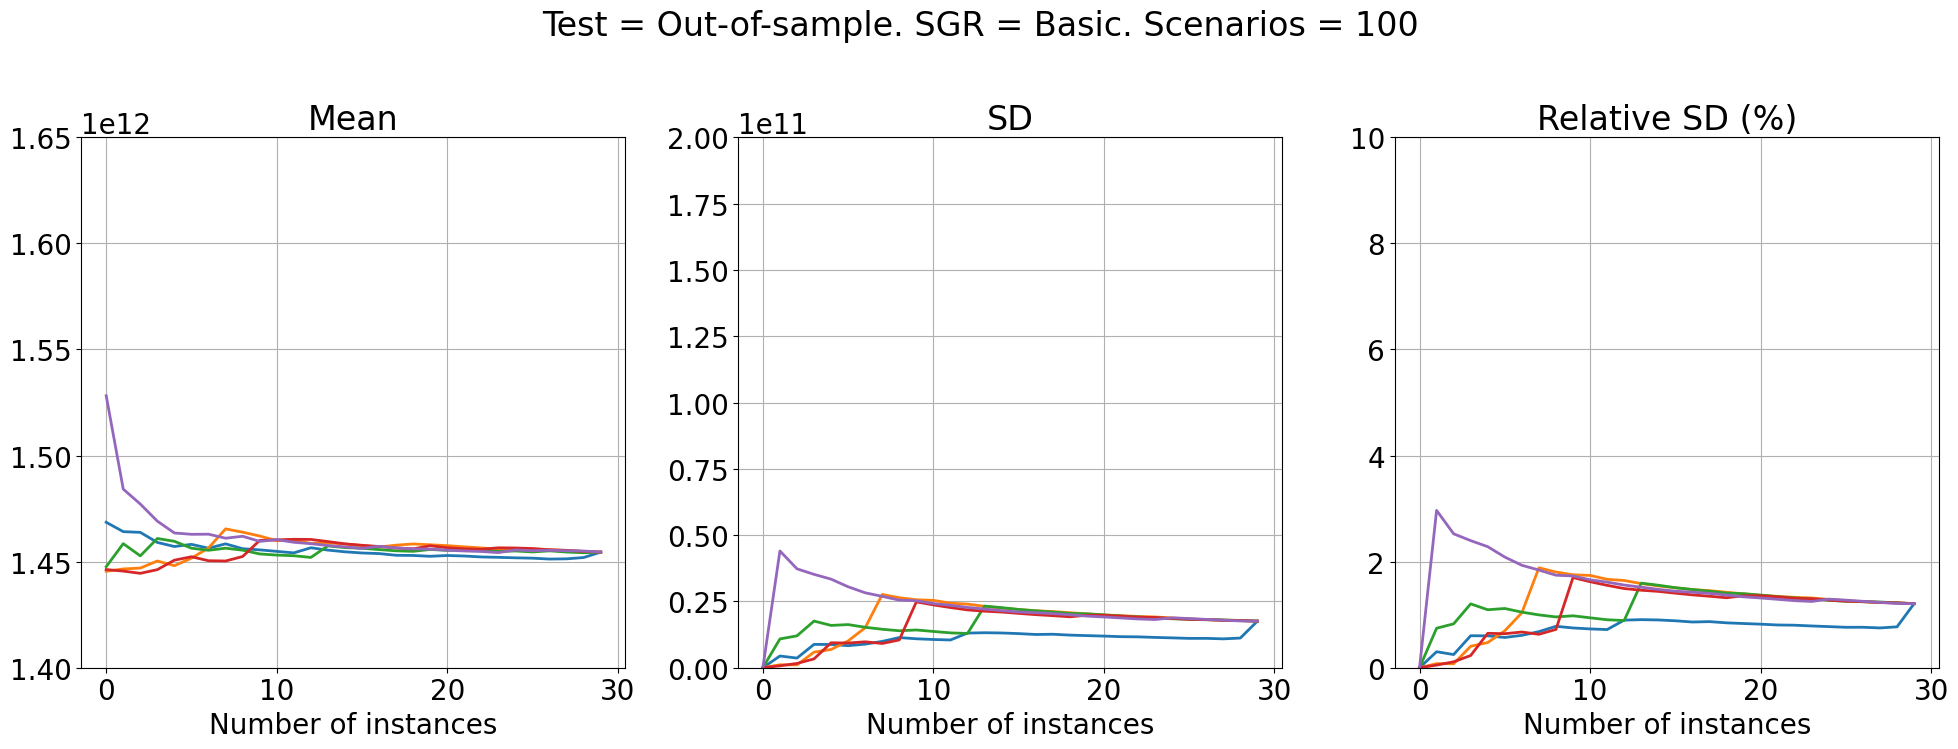

In [29]:
ylims_mean = {10: [1e12, 4e12], 50: [1.4e12, 1.65e12], 100: [1.4e12, 1.65e12]}
ylims_std = {10: [0, 1e12], 50: [0, 2e11], 100: [0, 2e11]}
ylims_rel_std = {10: [0, 50], 50: [0, 10], 100: [0, 10]}

method = "basic"
num_scenarios = 100

base_folder = f"NewOOS/dataset_europe_agg_v50/{method}_sce{num_scenarios}"

num_trials = 5  # Number of trials
num_instances = 30

all_mean_values = []
all_std_values = []
all_rel_std_values = []

for _ in range(num_trials):
    values = []

    for i in range(1, num_instances + 1):
        oos_value = 0
        num_trees_considered = 0
        for j in range(1, 11):
            oos_value_path = f"{base_folder}_{i}/oos_tree{j}/out_of_sample_values.csv"
            df_oos_value = pd.read_csv(oos_value_path)
            oos_tree_value = float(df_oos_value["Objective value"][0])
            oos_value += oos_tree_value
            num_trees_considered += 1
        values.append(oos_value / num_trees_considered)

    random.shuffle(values)

    obj_values = []

    for i in range(0, num_instances):
        appending_values = []
        for j in range(0, i + 1):
            appending_values.append(values[j])
        obj_values.append(appending_values)

    mean_values = [np.mean(x) for x in obj_values]
    std_values = [np.std(x) for x in obj_values]
    rel_std_values = [std_values[i] / mean_values[i] * 100 for i in range(len(std_values))]

    all_mean_values.append(mean_values)
    all_std_values.append(std_values)
    all_rel_std_values.append(rel_std_values)

# Create subplots
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot mean for each trial
for idx, mean_values in enumerate(all_mean_values):
    axs[0].plot(range(num_instances), mean_values, label=f'Trial {idx+1}', lw=2)

axs[0].set_xlabel('Number of instances')
axs[0].set_title('Mean')
axs[0].set_ylim(ylims_mean[num_scenarios][0], ylims_mean[num_scenarios][1])
axs[0].grid(True)


# Plot standard deviation for each trial
for idx, std_values in enumerate(all_std_values):
    axs[1].plot(range(num_instances), std_values, label=f'Trial {idx+1}', lw=2)

axs[1].set_xlabel('Number of instances')
axs[1].set_title('SD')
axs[1].set_ylim(ylims_std[num_scenarios][0], ylims_std[num_scenarios][1])
axs[1].grid(True)


# Plot relative standard deviation for each trial
for idx, rel_std_values in enumerate(all_rel_std_values):
    axs[2].plot(range(num_instances), rel_std_values, label=f'Trial {idx+1}', lw=2)

axs[2].set_xlabel('Number of instances')
axs[2].set_title('Relative SD (%)')
axs[2].set_ylim(ylims_rel_std[num_scenarios][0], ylims_rel_std[num_scenarios][1])
axs[2].grid(True)

# Add supertitle
plt.tight_layout(rect=[0, 0.03, 1, 0.9])  # Adjust the layout to make space for the suptitle
fig.suptitle(f"Test = Out-of-sample. SGR = {SGR_TO_TEXT_AND_COLOR[method][0]}. Scenarios = {num_scenarios}")

plt.savefig(f"ConvergencePlots/OOS-{method}-{num_scenarios}", bbox_inches="tight")
plt.show()


### OOS-tree size convergence

#### Multiple trials

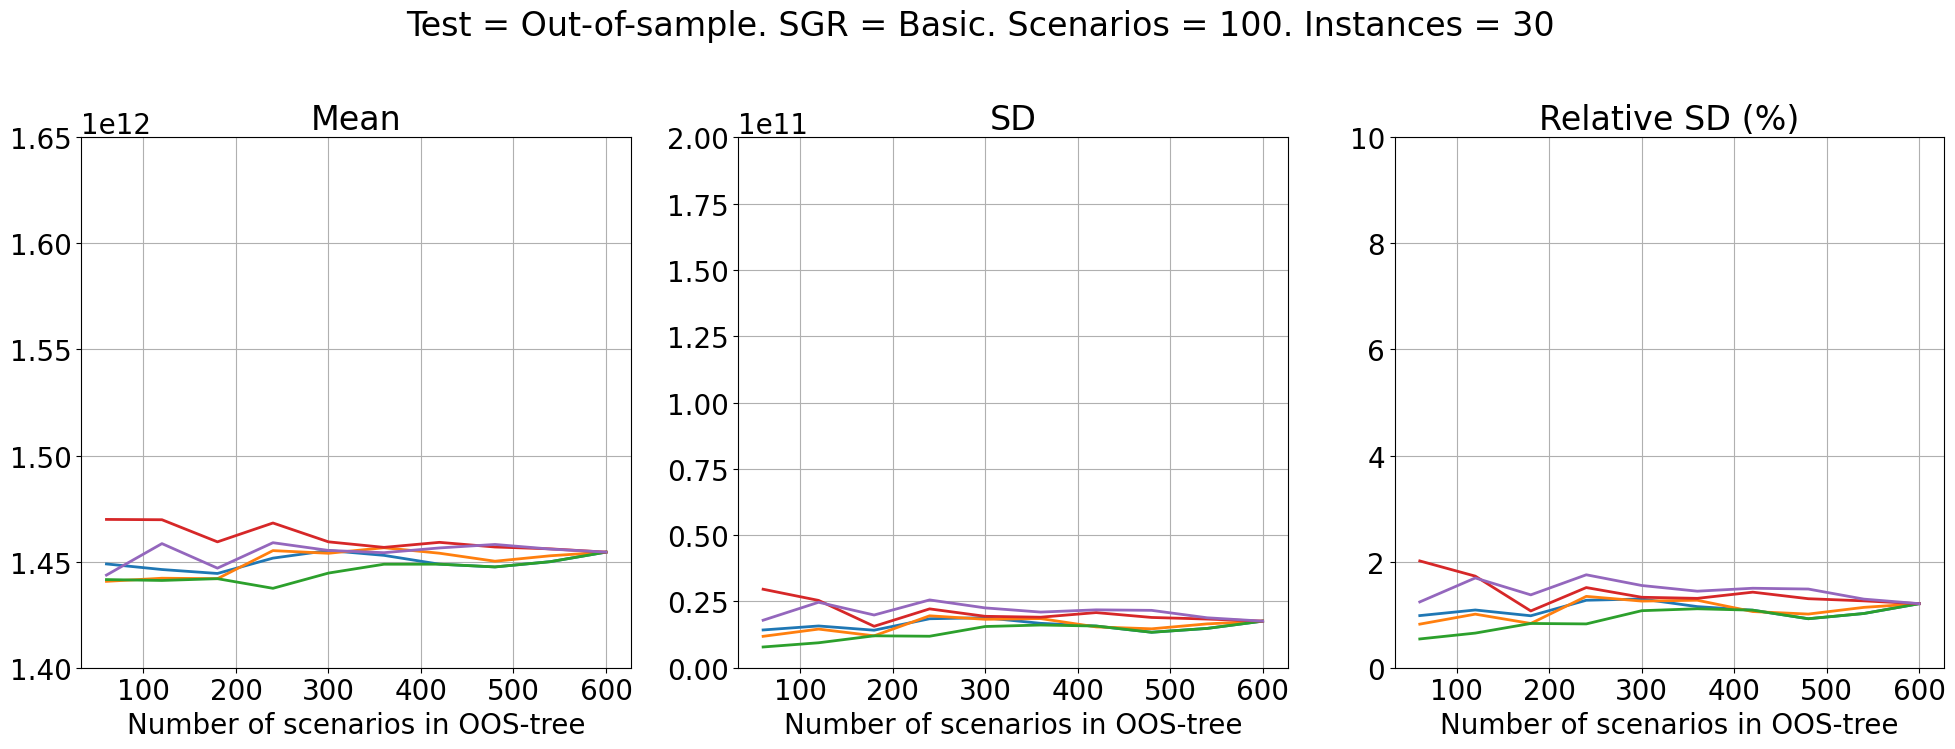

In [32]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ylims_mean = {10: [1e12, 4e12], 50: [1.4e12, 1.65e12], 100: [1.4e12, 1.65e12]}
ylims_std = {10: [0, 1e12], 50: [0, 2e11], 100: [0, 2e11]}
ylims_rel_std = {10: [0, 50], 50: [0, 10], 100: [0, 10]}

method = "basic"
num_scenarios = 100

num_instances = 30

# Define tree sizes
tree_sizes = [60 * i for i in range(1, 11)]

num_trials = 5  # Number of trials

base_folder = f"NewOOS/dataset_europe_agg_v50/{method}_sce{num_scenarios}"

mean_values_trials = []
std_values_trials = []
rel_std_values_trials = []

tree_indices = [_ for _ in range(1, 11)]

for _ in range(num_trials):
    mean_values = []
    std_values = []
    rel_std_values = []

    random.shuffle(tree_indices)

    for j in tree_indices:  # Loop over the 10 trees
        oos_values = []

        for i in range(1, num_instances + 1):  # Consider all instances
            inst_oos_values = []
            for k in range(0, tree_indices.index(j) + 1):  # Consider the first j trees
                tree_num = tree_indices[k]
                oos_value_path = f"{base_folder}_{i}/oos_tree{tree_num}/out_of_sample_values.csv"
                df_oos_value = pd.read_csv(oos_value_path)
                oos_tree_value = float(df_oos_value["Objective value"][0])
                inst_oos_values.append(oos_tree_value)
            oos_values.append(np.mean(inst_oos_values))
        
        mean_values.append(np.mean(oos_values))
        std_values.append(np.std(oos_values))
        rel_std_values.append(np.std(oos_values) / np.mean(oos_values) * 100)
    
    mean_values_trials.append(mean_values)
    std_values_trials.append(std_values)
    rel_std_values_trials.append(rel_std_values)


# Create subplots
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot mean for each trial
for idx, mean_values in enumerate(mean_values_trials):
    axs[0].plot(tree_sizes, mean_values, label=f'Trial {idx+1}', lw=2)

axs[0].set_xlabel('Number of scenarios in OOS-tree')
axs[0].set_title('Mean')
axs[0].set_ylim(ylims_mean[num_scenarios][0], ylims_mean[num_scenarios][1])
axs[0].grid(True)


# Plot standard deviation for each trial
for idx, std_values in enumerate(std_values_trials):
    axs[1].plot(tree_sizes, std_values, label=f'Trial {idx+1}', lw=2)

axs[1].set_xlabel('Number of scenarios in OOS-tree')
axs[1].set_title('SD')
axs[1].set_ylim(ylims_std[num_scenarios][0], ylims_std[num_scenarios][1])
axs[1].grid(True)


# Plot relative standard deviation for each trial
for idx, rel_std_values in enumerate(rel_std_values_trials):
    axs[2].plot(tree_sizes, rel_std_values, label=f'Trial {idx+1}', lw=2)

axs[2].set_xlabel('Number of scenarios in OOS-tree')
axs[2].set_title('Relative SD (%)')
axs[2].set_ylim(ylims_rel_std[num_scenarios][0], ylims_rel_std[num_scenarios][1])
axs[2].grid(True)

# Add supertitle
plt.tight_layout(rect=[0, 0.03, 1, 0.9])  # Adjust the layout to make space for the suptitle
fig.suptitle(f"Test = Out-of-sample. SGR = {SGR_TO_TEXT_AND_COLOR[method][0]}. Scenarios = {num_scenarios}. Instances = 30")

plt.savefig(f"ConvergencePlots/OOS-TreeSize-{method}-{num_scenarios}", bbox_inches="tight")
plt.show()